In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
font = {'size'   : 12}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# Stochastic calculus

## Riemann integral

Let $f$ be a real-valued function on the interval $[a=0,b=\tau]$, and let divide the $[a=0,b=\tau]$ in $N$ intervals, then the Riemann integral is approximated as

$$
\int_0^\tau f(t) \mathrm{d}t = \lim_{N \rightarrow +\infty} \sum_{k=0}^{N-1} f(\hat{t}_k) \left[t_{k+1} - t_k \right] \, ,
$$

with $\hat{t}_k \in [t_k, t_{k+1}]$.

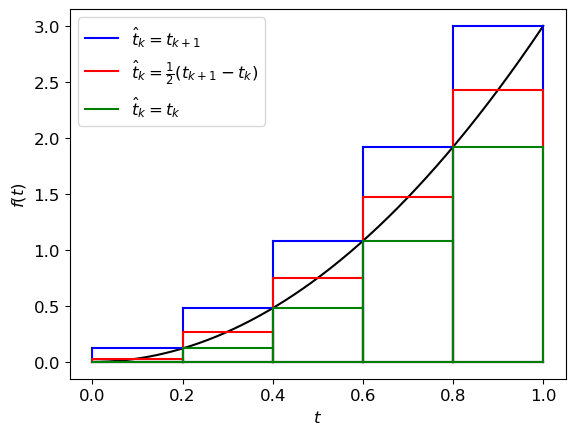

In [2]:
def f(t):
    return 3*t**2

t0 = 0
tau  = 1

N = 5
Delta_t = (tau - t0) / N



tvaluesc = np.linspace(0,tau, 1000)
plt.plot(tvaluesc, f(tvaluesc),'k')


hat_t   = 1.0*Delta_t
tvalues  = np.linspace(0,tau, N+1)


# to create legend:
plt.plot([tvalues[0], tvalues[0]], [0, 0], 'b', label = r'$\hat{t}_k = t_{k+1}$')
plt.plot([tvalues[0], tvalues[0]], [0, 0], 'r', label = r'$\hat{t}_k = \frac{1}{2}(t_{k+1} - t_k)$')
plt.plot([tvalues[0], tvalues[0]], [0, 0], 'g', label = r'$\hat{t}_k = t_k$')


for k in range(N):
    plt.plot([tvalues[k], tvalues[k+1]], [0, 0], 'b')
    plt.plot([tvalues[k], tvalues[k]], [0, f(tvalues[k] + hat_t)], 'b')
    plt.plot([tvalues[k] , tvalues[k+1]], [f(tvalues[k] + hat_t), f(tvalues[k] + hat_t)], 'b')
    plt.plot([tvalues[k+1], tvalues[k+1]], [0, f(tvalues[k] + hat_t)], 'b')
    
    
hat_t   = 0.5*Delta_t
tvalues  = np.linspace(0,tau, N+1)

for k in range(N):
    plt.plot([tvalues[k], tvalues[k+1]], [0, 0], 'r')
    plt.plot([tvalues[k], tvalues[k]], [0, f(tvalues[k] + hat_t)], 'r')
    plt.plot([tvalues[k] , tvalues[k+1]], [f(tvalues[k] + hat_t), f(tvalues[k] + hat_t)], 'r')
    plt.plot([tvalues[k+1], tvalues[k+1]], [0, f(tvalues[k] + hat_t)], 'r')
    
hat_t   = 0.0*Delta_t
tvalues  = np.linspace(0,tau, N+1)

for k in range(N):
    plt.plot([tvalues[k], tvalues[k+1]], [0, 0], 'g')
    plt.plot([tvalues[k], tvalues[k]], [0, f(tvalues[k] + hat_t)], 'g')
    plt.plot([tvalues[k] , tvalues[k+1]], [f(tvalues[k] + hat_t), f(tvalues[k] + hat_t)], 'g')
    plt.plot([tvalues[k+1], tvalues[k+1]], [0, f(tvalues[k] + hat_t)], 'g')
    

plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend();

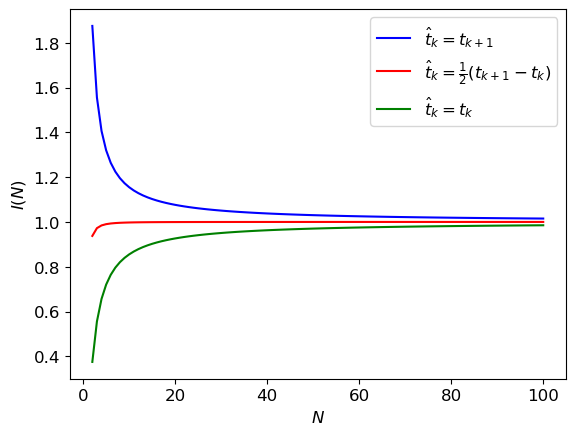

In [3]:
Nvalues = np.linspace(2,100,98,dtype=int)

hat_t1   = 1.0 * Delta_t
hat_t2   = 0.5 * Delta_t
hat_t3   = 0.0 * Delta_t

I1 = np.zeros(len(Nvalues))
I2 = np.zeros(len(Nvalues))
I3 = np.zeros(len(Nvalues))


for n,N in enumerate(Nvalues):
    Delta_t = (tau - t0) / N
    hat_t1   = 1.0 * Delta_t
    hat_t2   = 0.5 * Delta_t
    hat_t3   = 0.0 * Delta_t
    tvalues  = np.linspace(0,tau, N+1)

    for k in range(N):
        I1[n] = I1[n] + f(tvalues[k] + hat_t1) * Delta_t
        I2[n] = I2[n] + f(tvalues[k] + hat_t2) * Delta_t
        I3[n] = I3[n] + f(tvalues[k] + hat_t3) * Delta_t


        
plt.plot(Nvalues, I1, 'b', label = r'$\hat{t}_k = t_{k+1}$')
plt.plot(Nvalues, I2, 'r', label = r'$\hat{t}_k = \frac{1}{2}(t_{k+1} - t_k)$')
plt.plot(Nvalues, I3, 'g', label = r'$\hat{t}_k = t_k$')
plt.ylabel(r'$I(N)$')
plt.xlabel(r'$N$')
plt.legend()
#plt.ylim((0,2));

## Stochastic integral

Instead of integrating over time values $[0,\tau]$, we integrate the function $f$ over random variables $W_t$.

$$
\int_0^T f(W_t) \, \mathrm{d}W_t = \lim_{N \rightarrow +\infty} \sum_{k=0}^{N-1} f(\hat{W}_k) \left[ W_{k+1} - W_k \right] \, ,
$$

with $\hat{W}_k \in [W_k, W_{k+1}]$.

### Example

$$
\int_0^{\tau} W(t) \, dW(t) = \lim_{N\rightarrow \infty} \sum_{k=0}^{N-1} W(\hat{t}_k) \Delta W_k
$$

#### Ito integral
$$
\int_0^{\tau} W(t) \, dW(t) = \lim_{N\rightarrow \infty} \sum_{k=0}^{N-1} W(t_k) \Delta W_k = \frac{1}{2}\left(W(\tau) - \tau\right)
$$

#### Stratonovich integral
$$
\int_0^{\tau} W(t) \, dW(t) = \lim_{N\rightarrow \infty} \sum_{k=0}^{N-1}\frac{1}{2} \left[W(t_k) + W(t_{k+1}) \right] \Delta W_k = \frac{1}{2} W(\tau)
$$

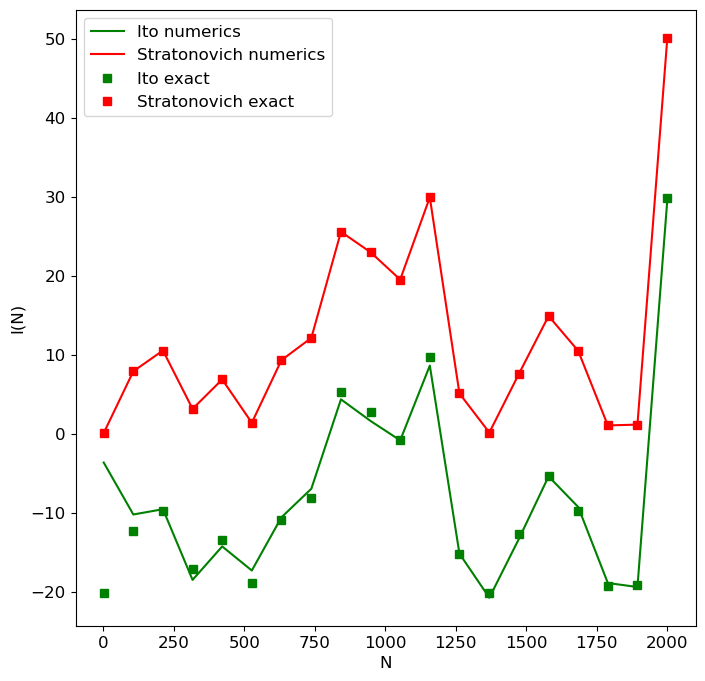

In [6]:
t0 = 0
tau  = 40.5

Nvalues = np.linspace(2,2000,20,dtype=int)

# Store numerical result
Ii = np.zeros(len(Nvalues))
Is = np.zeros(len(Nvalues))

# Store exact result
Ito    = np.zeros(len(Nvalues))
Strato = np.zeros(len(Nvalues))

for n,N in enumerate(Nvalues):
    
    # Calculate timestep
    Delta_t = (tau - t0) / N
    
    # Draw increments from a Gaussian distribution
    Delta_W  = np.random.normal(0, 1, N) * np.sqrt(Delta_t)
    
    # Build the Wiener process
    W        = np.cumsum(Delta_W) 
    
    # Add W_0 = 0
    W        = np.insert(W, 0, 0., axis=0)
    
    for k in range(N):

        Ii[n] = Ii[n] +       (W[k])          * Delta_W[k]
        Is[n] = Is[n] + 0.5 * (W[k] + W[k+1]) * Delta_W[k] # Delta_W[k] = Delta_W[k+1] - Delta_W[k]
         

    Ito[n]         = 0.5 * (W[N]**2 - tau)
    Strato[n]      = 0.5 * W[N]**2
        
        
fig, (ax0) = plt.subplots(1, figsize=(8, 8))



ax0.plot(Nvalues, Ii, 'g', label = r'Ito numerics')
ax0.plot(Nvalues, Is, 'r', label = r'Stratonovich numerics')

ax0.plot(Nvalues, Ito, 'gs', label = r"Ito exact")
ax0.plot(Nvalues, Strato, 'rs', label = r"Stratonovich exact")

ax0.set_ylabel('I(N)')
ax0.set_xlabel('N')
ax0.legend()


#plt.ylim((0,2));

Convergence of 
$$\lim_{N\rightarrow +\infty} \sum_{k=0}^{N-1} (W_{k+1} - W_k)^2 = \tau$$

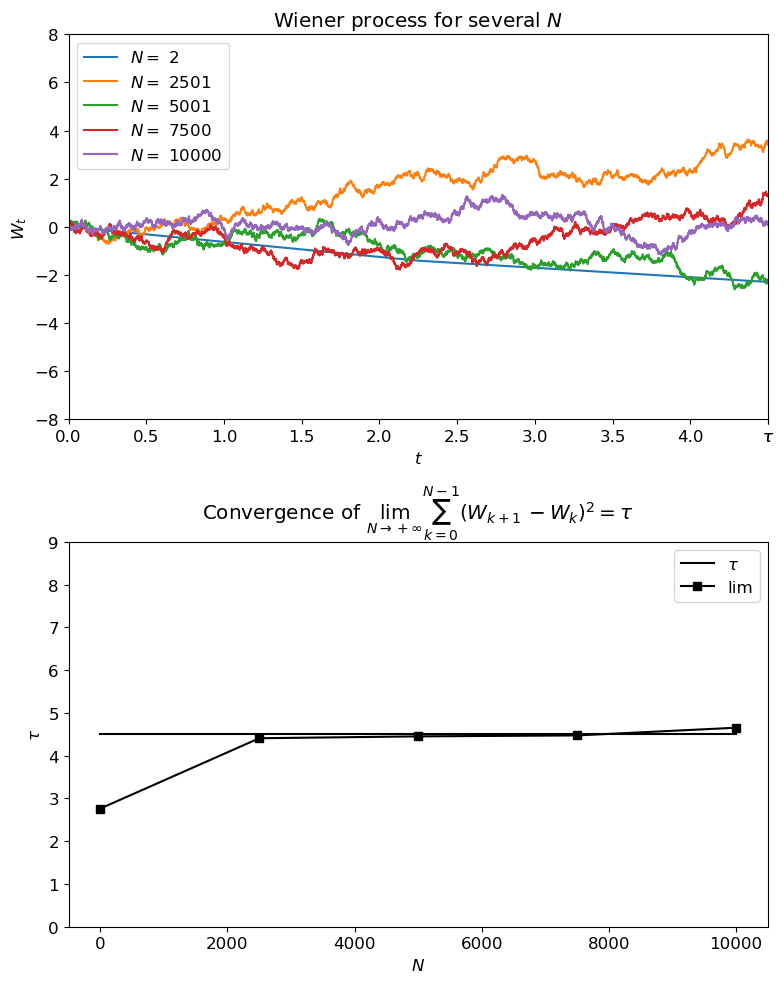

In [5]:
t0 = 0
tau  = 4.5

Nvalues = np.linspace(2,10000,5,dtype=int)
taun   = np.zeros(len(Nvalues))

fig, (ax0,ax1) = plt.subplots(2, figsize=(8, 10))


for n,N in enumerate(Nvalues):
    
    # Calculate timestep
    Delta_t = (tau - t0) / N
    
    # Draw increments from a Gaussian distribution
    Delta_W  = np.random.normal(0, 1, N)
    
    # Build the Wiener process
    W        = np.cumsum(Delta_W) * np.sqrt(Delta_t)
    
    # Add W_0 = 0
    W        = np.insert(W, 0, 0., axis=0)
    
    tvalues  = np.linspace(0,tau, N+1)
    
    ax0.plot(tvalues, W, label=r"$N=$ %d" %N)
    
    for k in range(N):
        taun[n] = taun[n] + (W[k+1] - W[k])**2 # Delta_W[k]**2*Delta_t
    
ax0.set_ylabel(r'$W_t$')
ax0.set_xlabel(r'$t$')
ax0.set_title(r"Wiener process for several $N$")
ax0.set_xlim((0, tau))

ax0.set_ylim((-8, 8))

x_ticks       = np.append(ax0.get_xticks(), tau)
x_tickslabels = np.append(ax0.get_xticklabels(), r"$\tau$")

# Set xtick locations to the values of the array `x_ticks`
ax0.set_xticks(x_ticks)
ax0.set_xticklabels(x_tickslabels)

ax0.legend(loc="upper left")


ax1.plot(Nvalues, tau*np.ones(len(Nvalues)),'k',label=r'$\tau$')
ax1.plot(Nvalues, taun,'ks-',label='lim')
ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$\tau$')
ax1.set_ylim((0, 2*tau))
ax1.legend()

fig.tight_layout()